# Stock Long-Term Investment

In [7]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt

In [9]:
tickers = tickers = ['DPS', 'KO', 'PEP'] 
start = '2011-1-1' 
end = '2015-12-31'
portfolio = pd.DataFrame()

for t in tickers:
    portfolio[t] = pdr.get_data_yahoo(t, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 downloaded

In [23]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2011-01-03 to 2015-12-31
Data columns (total 3 columns):
DPS    1258 non-null float64
KO     1258 non-null float64
PEP    1258 non-null float64
dtypes: float64(3)
memory usage: 39.3 KB


In [24]:
portfolio.head()

,DPS,KO,PEP
Date,,,
2011-01-03,29.253212,26.601126,54.007835
2011-01-04,29.344131,26.050512,53.728573
2011-01-05,29.964083,25.895519,54.697815
2011-01-06,30.236858,25.707903,54.903172
2011-01-07,29.294533,25.663036,54.533543


In [26]:
portfolio.tail()

,DPS,KO,PEP
Date,,,
2015-12-24,90.045876,41.132893,95.667877
2015-12-28,90.438972,41.085659,95.801094
2015-12-29,91.071739,41.293491,96.533783
2015-12-30,90.745773,41.161228,96.248329
2015-12-31,89.355591,40.584953,95.077927


In [27]:
# Extract the very first row of the data
portfolio.iloc[0]

DPS    29.253212
KO     26.601126
PEP    54.007835
Name: 2011-01-03 00:00:00, dtype: float64

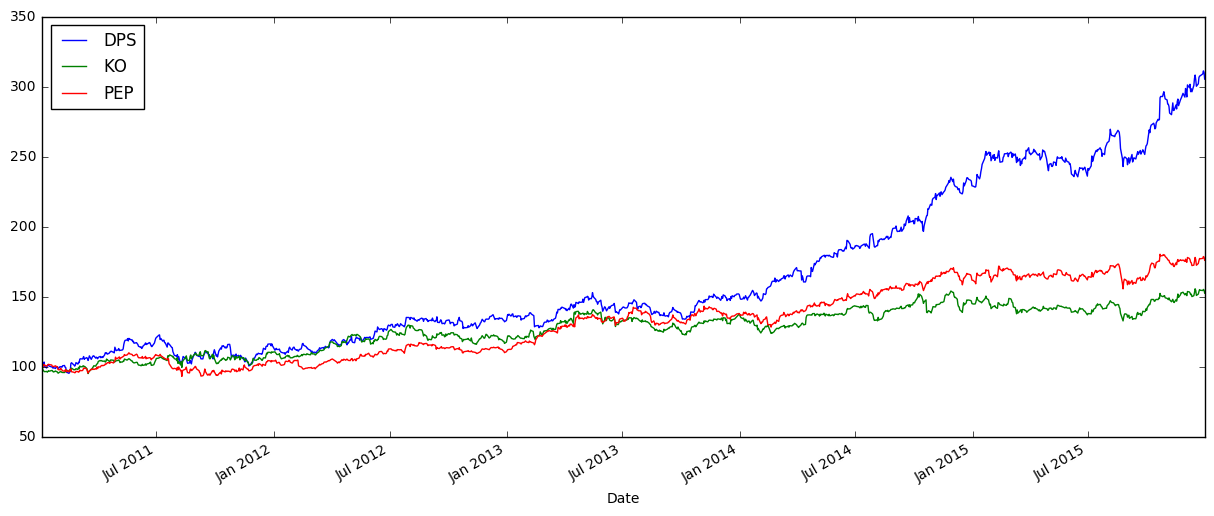

In [28]:
# Normalize returns to 100
(portfolio / portfolio.iloc[0] * 100).plot(figsize = (15,6))
plt.show()

In [10]:
portfolio_returns = np.log(portfolio / portfolio.shift(1))

In [15]:
# Calculate the variance of a particular assets daily returns
DPS_var = portfolio_returns['DPS'].var()

In [16]:
DPS_var

0.00013268791445022362

In [17]:
# Annualize the var from daily returns
DPS_var_a = portfolio_returns['DPS'].var() * 250

In [18]:
DPS_var_a 

0.03317197861255591

In [29]:
each_var = portfolio_returns.var()
each_var

DPS    0.000133
KO     0.000091
PEP    0.000078
dtype: float64

In [30]:
each_std = portfolio_returns.std()
each_std

DPS    0.011519
KO     0.009561
PEP    0.008837
dtype: float64

In [31]:
each_mean = portfolio_returns.mean()
each_mean

DPS    0.000888
KO     0.000336
PEP    0.000450
dtype: float64

In [34]:
# Risk_free rate: 1 %
excess_daily_ret = portfolio - 0.01/252
excess_daily_ret

,DPS,KO,PEP
Date,,,
2011-01-03,29.253172,26.601086,54.007795
2011-01-04,29.344091,26.050472,53.728533
2011-01-05,29.964043,25.895479,54.697775
2011-01-06,30.236818,25.707863,54.903132
2011-01-07,29.294493,25.662996,54.533503
2011-01-10,28.996922,25.720097,54.254229
2011-01-11,29.451540,25.569183,54.484213
2011-01-12,29.641670,25.711943,54.812788
2011-01-13,29.550749,25.858769,54.960642


In [35]:
each_ex = excess_daily_ret.mean()
each_ex

DPS    48.106150
KO     33.748131
PEP    71.190052
dtype: float64

In [37]:
# Sharpe Ratio
Rf = 0.01
each_SR = (np.sqrt(252) * each_mean) / each_std
each_SR

DPS    1.224222
KO     0.557985
PEP    0.808289
dtype: float64

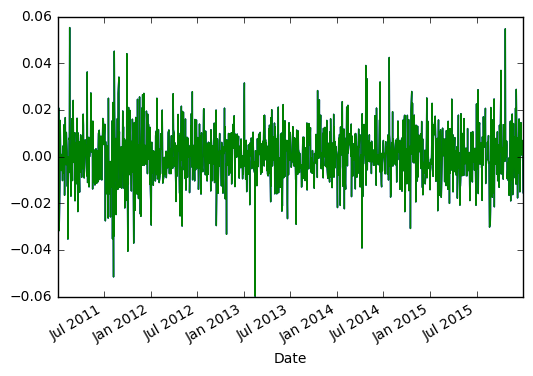

In [39]:
 portfolio_returns['DPS'].plot()
 plt.show()

In [44]:
# Calculate the simple rate of return 
portfolio_simple_return = (portfolio / portfolio.shift(1)) - 1
print(portfolio_simple_return.head())

                 DPS        KO       PEP
Date                                    
2011-01-03       NaN       NaN       NaN
2011-01-04  0.003108 -0.020699 -0.005171
2011-01-05  0.021127 -0.005950  0.018040
2011-01-06  0.009103 -0.007245  0.003754
2011-01-07 -0.031165 -0.001745 -0.006732


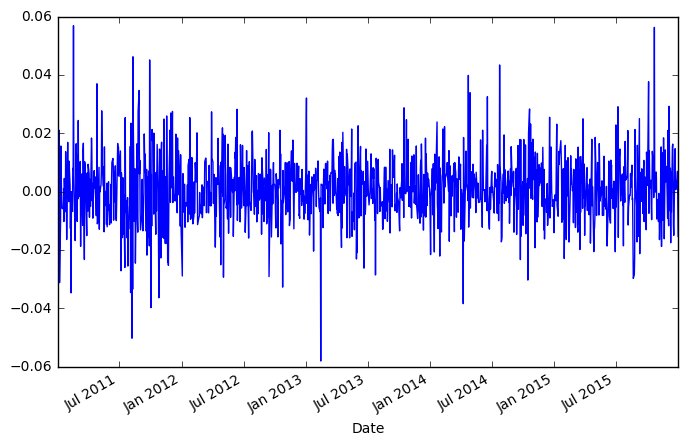

In [45]:
# plot the daily returns 
portfolio_simple_return['DPS'].plot(figsize=(8,5)) 
plt.show()

In [46]:
# Calculate the average daily return
avg_returns_d = portfolio_simple_return['DPS'].mean()
avg_returns_d

0.0009550717746008111

In [53]:
# Calculate the average annual return per 250 trading days
avg_returns_a = portfolio_simple_return['DPS'].mean() * 250
print(str(round(avg_returns_a,5)*100) + '%')

23.877000000000002%


In [41]:
# Calclulate the log returns for a given security
portfolio_log_return = np.log(portfolio / portfolio.shift(1))
print(portfolio_log_return.head())

                 DPS        KO       PEP
Date                                    
2011-01-03       NaN       NaN       NaN
2011-01-04  0.003103 -0.020916 -0.005184
2011-01-05  0.020907 -0.005967  0.017879
2011-01-06  0.009062 -0.007271  0.003747
2011-01-07 -0.031661 -0.001747 -0.006755


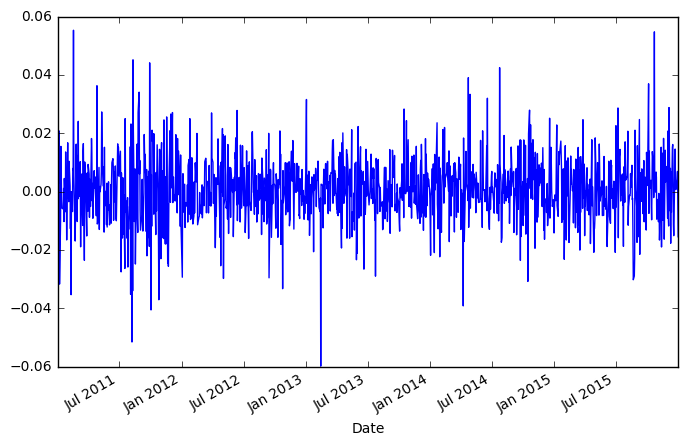

In [42]:
# Plot the log returns
portfolio_log_return['DPS'].plot(figsize=(8,5))
plt.show()

In [43]:
# find the log daily return
log_return_d = portfolio_log_return['DPS'].mean()
# find the log annual return
log_return_a = portfolio_log_return['DPS'].mean() * 250
print(str(round(log_return_a,5) * 100) + '%')

22.208%


In [19]:
# calculate the covariance matrix for the daily returns of selected assets
cov_matrix_d = portfolio_returns.cov()
cov_matrix_d

,DPS,KO,PEP
DPS,0.000133,0.000060,0.000058
KO,0.000060,0.000091,0.000053
PEP,0.000058,0.000053,0.000078


In [20]:
# Annualize the covariance matrix 
cov_matrix_a = portfolio_returns.cov() * 250
cov_matrix_a

,DPS,KO,PEP
DPS,0.033172,0.014904,0.014438
KO,0.014904,0.022854,0.013341
PEP,0.014438,0.013341,0.019521


In [21]:
# Calculate the correlation of the daily returns of selected assets
corr_matrix = portfolio_returns.corr()
corr_matrix

,DPS,KO,PEP
DPS,1.000000,0.541295,0.567374
KO,0.541295,1.000000,0.631629
PEP,0.567374,0.631629,1.000000
